# 线性回归（多元）

In [20]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

## 数据引入

X_train= np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
X_train[1]

In [88]:
data=np.loadtxt('houses.txt',delimiter=',')
X_train=data[:,0:4]
y_train=data[:,4]

In [89]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

## 成本函数（这里我们使用点积加快运算）

In [90]:
def compute_cost(X,y,w,b):
    m=X.shape[0]
    cost=0.0
    for i in range(m):
        f_wb_i=np.dot(X[i],w)+b
        cost+=(f_wb_i-y[i])**2
    cost=cost/(2*m)
    return cost

## 求w,b的偏导数

In [91]:
def compute_gradient(X,y,w,b):
    m,n=X.shape
    d_w=np.zeros((n,))
    d_b=0
    for i in range(m):
        err=np.dot(X[i],w)+b-y[i]
        for j in range(n):
            d_w[j]=d_w[j]+err*X[i,j]
        d_b=d_b+err
    d_w=d_w/m
    d_b=d_b/m
    return d_w,d_b

## 实现梯度下降

In [92]:
def  gradient_descent(X,y,w_in,b_in,alpha,num_iters,cost_function,gradient_function):
    w=copy.deepcopy(w_in)
    b=b_in
    J_History=[]
    for i in range(num_iters):
        d_w,d_b=compute_gradient(X,y,w,b)
        w=w-alpha*d_w
        b=b-alpha*d_b
        if i<100000:      
            J_History.append(cost_function(X, y, w,b))
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_History[-1]:8.2f}   ")   
    return w, b, J_History

In [105]:
S_w = np.zeros_like(w_init)
S_b = 0
iterations = 1000
alpha = 5.0e-10
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, S_w, S_b, alpha, iterations,compute_cost, compute_gradient)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 70873.48   
Iteration  100: Cost 57349.36   
Iteration  200: Cost 46464.36   
Iteration  300: Cost 37703.46   
Iteration  400: Cost 30652.18   
Iteration  500: Cost 24976.88   
Iteration  600: Cost 20409.07   
Iteration  700: Cost 16732.63   
Iteration  800: Cost 13773.60   
Iteration  900: Cost 11392.00   
b,w found by gradient descent: 0.00,[1.68e-01 3.04e-04 1.56e-04 3.67e-03] 
prediction: 159.72, target value: 271.5
prediction: 208.64, target value: 300.0
prediction: 326.24, target value: 509.8
prediction: 289.14, target value: 394.0
prediction: 328.24, target value: 540.0
prediction: 220.18, target value: 415.0
prediction: 144.99, target value: 230.0
prediction: 307.64, target value: 560.0
prediction: 172.04, target value: 294.0
prediction: 535.40, target value: 718.2
prediction: 132.30, target value: 200.0
prediction: 201.09, target value: 302.0
prediction: 260.90, target value: 468.0
prediction: 239.64, target value: 374.2
prediction: 204.44, target value: 3

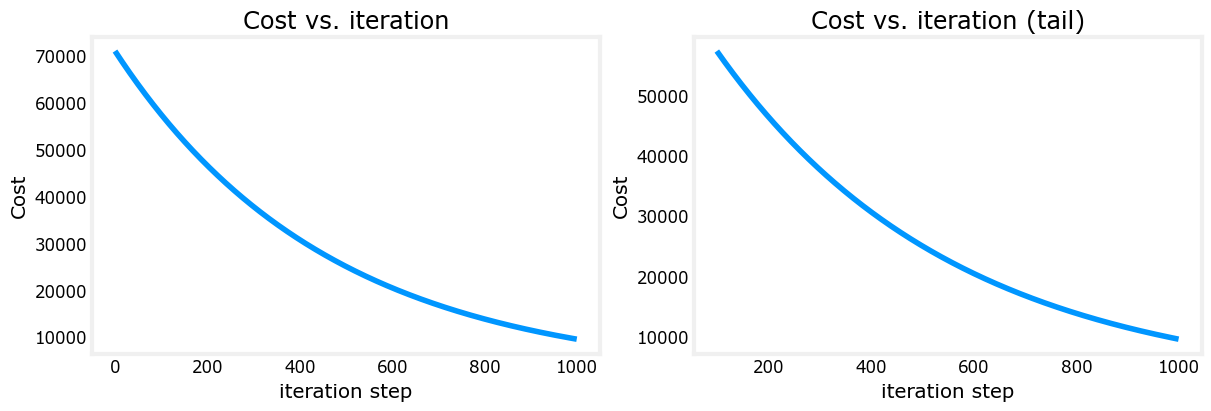

In [106]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()